In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
trainX_df = pd.read_fwf('./Dados/har_smartphone/X_train.txt', header = None)
testX_df = pd.read_fwf('./Dados/har_smartphone/X_test.txt', header = None)
trainY_df = pd.read_csv('./Dados/har_smartphone/y_train.txt', header = None)
testY_df = pd.read_csv('./Dados/har_smartphone/y_test.txt', header = None)

In [3]:
print (testX_df.shape, trainX_df.shape, trainY_df.shape, testY_df.shape)

(2947, 561) (7352, 561) (7352, 1) (2947, 1)


In [4]:
trainX = trainX_df.values
trainY = trainY_df.values
testX = testX_df.values
testY = testY_df.values
print (testX.shape, trainX.shape, trainY.shape, testY.shape)

(2947, 561) (7352, 561) (7352, 1) (2947, 1)


In [5]:
''' subtrai 1 dos valores de saída para ficar de acordo com o enunciado que segue:
# 0 – caminhada; 1 – subindo escadas;
# 2 – descendo escadas; 3 – sentado; 
# 4 – em pé; 5 – deitado '''

for i in range(len(trainY)):
    trainY[i] = trainY[i] - 1

for i in range(len(testY)):
    testY[i] = testY[i] - 1

In [6]:
def one_hot_it(array):
    ''' Recebe uma matriz de probabilidade, retorna 1 para a maior probabilidade e 0 para o resto '''
    onehot = np.zeros(shape = array.shape)
    #onehot = np.matrix(array.shape[1])
    for i in range(len(array)):
        max_index = array[i].argmax()
        onehot[i][max_index] = 1
    return onehot

In [7]:
def one_hot_encoder(data):
    ''' Recebe dados categorizados (inteiros) e retorna um vetor one-hot. Exemplo [3]-> [0, 0, 0, 1, 0, 0]'''
    encoded = np.matrix(np.zeros(len(data)*int(max(data)+1))).reshape((len(data), int(max(data)+1)))
    for i in range(len(data)):
        max_index = data[i]
        encoded[i, max_index] = 1
    return encoded

In [8]:
def one_hot_decoder(data):
    ''' Recebe vetor one-hot e converte para categoria. Exemplo [0, 0, 0, 1, 0, 0] -> [3]'''
    decoded = np.zeros(data.shape[0]).reshape(-1,1)
    for i in range(len(data)):
        decoded[i] = np.argmax(data[i])
    return decoded     

In [9]:
def normalize_data(data):
    ''' Converte os valores de um dataset para uma norma <= 1'''
    m, n = data.shape
    for column in range(n):
        max_value = float(max(data[:, column]))
        min_value = float(min(data[:, column]))
        if (abs(min_value) > max_value):
            max_value = abs(min_value)            
        data[:,column] = data[:, column]/max_value
    return data

In [10]:
def softmax(z):
    ''' softmax: recebe net_input(x@w) e gera matriz de probabilidades conforme cada classe '''
    numerator = np.exp(z.T)
    denominator = np.sum(np.exp(z), axis = 1)
    return (np.transpose(numerator/denominator.T))

In [11]:
testX_normalized = normalize_data(testX)
trainX_normalized = normalize_data(trainX)

In [12]:
vetor_teste = np.array([0,0,0,1,1,1,2,3,4,3,4,3,2])
vetor_teste = trainY
enc = one_hot_encoder(vetor_teste)
print(enc)
dec = one_hot_decoder(enc)
print(dec)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]
[[4.]
 [4.]
 [4.]
 ...
 [1.]
 [1.]
 [1.]]


In [65]:
def calcGradLoss(w,x,y,m):
    ''' Calcula o gradiente e a função de custo do tipo (Zero One Loss) para a instância de treinamento '''
    y_mat = one_hot_encoder(y) #Next we convert the integer class coding into a one-hot representation
    scores = np.dot(x,w) #Then we compute raw class scores given our input and current weights
    prob = softmax(scores) #Next we perform a softmax on these scores to get their probabilities
    ŷ_ = one_hot_it(prob)
    loss = zero_one_loss(y_mat, ŷ_)
    grad = (-1 / m) * np.dot(x.T,(y_mat - prob)) #And compute the gradient for that loss
    return grad, loss

In [66]:
def zero_one_loss(y, ŷ):
    ''' Calcula quão diferente está a estimativa de classe da classe real
        a partir da norma do vetor diferença (esperado - estimado)'''
    diff = (y - ŷ)
    norma = np.dot(diff.T, diff)/2
    soma_linha = np.sum(abs(norma), axis = 1)
    total_error = np.sum(soma_linha)
    loss = total_error/len(y)
    return loss

### Loop de treinamento
- O treinamento é baseado em esforço computacional com base no gradiente descendente para o softmax (entropia cruzada)
- Como métrica de desempenho, utilizou-se Zero One Loss comentado acima
- O algoritmo itera atualizando seus pesos com base num passo de aprendizado (learningRate) * gradiente, até se chegar em um erro Zero One Loss menor que 0.1

In [68]:
x = trainX_normalized
x = np.insert(x, 0, 1, 1) # adiciona coluna de 1's (bias)
y = trainY
n_features = x.shape[1]
n_classes = len(np.unique(y))
n_samples = x.shape[0]

# inicia matriz de pesos com dim = (#features + 1, #classes)
w = np.random.rand(n_features*n_classes).reshape(n_features, n_classes) 
learningRate = 0.05
losses = []
loss = 9e9
tolerance = 0.1

#for i in range(0,iterations):
while (loss > tolerance):
    grad, loss = calcGradLoss(w,x,y,n_samples)
    losses.append(loss)
    w = w - (learningRate * grad)
    print(loss)
    if i%100 == 0:
        print("#i: ", i)

1.6507072905331883
1.840859630032644
1.4670837867247009
1.5688248095756256
1.4197497279651796
1.426006528835691
1.3702393906420023
1.4793253536452666
1.3471164309031556
1.4507616974972797
1.3131120783460284
1.4202937976060936
1.281556039173014
1.3876496191512513
1.249727965179543
1.352829162132753
1.2132752992383025
1.3242655059847661
1.1724700761697497
1.2842763873775844
1.1256800870511425
1.2328618063112078
1.0805223068552774
1.1634929270946681
1.0272034820457019
1.1101741022850924
0.9945593035908596
1.0489662676822633
0.9747007616974973
1.0073449401523396
0.9605549510337323
0.9869423286180631
0.9453210010881393
0.970892274211099
0.9279107725788901
0.955386289445049
0.9145810663764962
0.94069640914037
0.9009793253536452
0.9281828073993471
0.8900979325353645
0.9164853101196954
0.8745919477693145
0.9036996735582155
0.8626224156692056
0.8900979325353645
0.8460282916213275
0.8735038084874864
0.8337867247007617
0.8631664853101197
0.823177366702938
0.8541893362350381
0.8139281828073993
0.8

0.20919477693144722
0.2089227421109902
0.2089227421109902
0.2086507072905332
0.2086507072905332
0.20756256800870512
0.20729053318824808
0.20701849836779107
0.20620239390642003
0.205930359085963
0.205930359085963
0.20565832426550598
0.20565832426550598
0.20565832426550598
0.20538628944504897
0.20484221980413492
0.2045701849836779
0.2042981501632209
0.2042981501632209
0.20375408052230687
0.20348204570184983
0.20321001088139282
0.20321001088139282
0.2029379760609358
0.2026659412404788
0.20212187159956474
0.20212187159956474
0.20076169749727965
0.1999455930359086
0.19967355821545157
0.1988574537540805
0.1988574537540805
0.1988574537540805
0.1988574537540805
0.1988574537540805
0.1985854189336235
0.19831338411316649
0.19831338411316649
0.19831338411316649
0.19831338411316649
0.19776931447225246
0.19749727965179542
0.1972252448313384
0.1969532100108814
0.19668117519042438
0.19640914036996734
0.19613710554951033
0.1955930359085963
0.1955930359085963
0.1955930359085963
0.1953210010881393
0.1947

0.1368335146898803
0.13628944504896626
0.13628944504896626
0.13628944504896626
0.13628944504896626
0.13601741022850924
0.13601741022850924
0.13601741022850924
0.13601741022850924
0.13601741022850924
0.13574537540805223
0.13547334058759522
0.13547334058759522
0.13492927094668117
0.13492927094668117
0.13492927094668117
0.13465723612622416
0.13438520130576714
0.13438520130576714
0.13411316648531013
0.13411316648531013
0.13411316648531013
0.1338411316648531
0.1338411316648531
0.1338411316648531
0.1338411316648531
0.1338411316648531
0.1338411316648531
0.1338411316648531
0.1338411316648531
0.1338411316648531
0.13356909684439608
0.13356909684439608
0.13356909684439608
0.13329706202393907
0.13329706202393907
0.13329706202393907
0.13329706202393907
0.13329706202393907
0.13329706202393907
0.13329706202393907
0.13302502720348205
0.13275299238302501
0.13275299238302501
0.13275299238302501
0.132480957562568
0.132480957562568
0.13193688792165398
0.13193688792165398
0.13193688792165398
0.131392818280

0.10364526659412404
0.10364526659412404
0.10364526659412404
0.10364526659412404
0.10337323177366703
0.10337323177366703
0.10337323177366703
0.10337323177366703
0.10337323177366703
0.10310119695321002
0.10310119695321002
0.10310119695321002
0.10310119695321002
0.10310119695321002
0.10310119695321002
0.10337323177366703
0.10337323177366703
0.10337323177366703
0.10337323177366703
0.10310119695321002
0.10310119695321002
0.10310119695321002
0.10310119695321002
0.10282916213275299
0.10282916213275299
0.10282916213275299
0.10228509249183895
0.10228509249183895
0.10228509249183895
0.10228509249183895
0.10228509249183895
0.10201305767138194
0.10174102285092491
0.10174102285092491
0.10174102285092491
0.10174102285092491
0.10174102285092491
0.10174102285092491
0.10174102285092491
0.10174102285092491
0.10174102285092491
0.10174102285092491
0.10174102285092491
0.10174102285092491
0.1014689880304679
0.1014689880304679
0.1014689880304679
0.10119695321001088
0.10119695321001088
0.10119695321001088
0.1

min loss: 0.09983677910772579


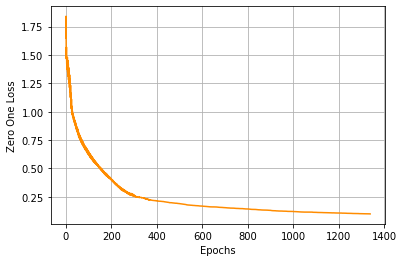

In [69]:
print("min loss:", min(losses))
plt.plot(losses, color = "darkorange")
plt.xlabel("Epochs")
plt.ylabel("Zero One Loss")
plt.grid(True)

### Avaliando o modelo

In [70]:
x = testX_normalized
x = np.insert(x, 0, 1, 1) # adiciona coluna de 1's (bias)
y = testY
ŷ = one_hot_it(softmax(x@w))
ŷ = one_hot_decoder(ŷ)

def calc_error(ŷ, y):
    acerto = 0
    erro = 0
    for i in range(len(ŷ)):
        if int(ŷ[i]) == int(y[i]):
            acerto += 1
        else:
            erro += 1
    print("acertos:\t", acerto, "\nerros:\t\t", erro, "\nerro(%):\t", 100*erro/(acerto+erro))

calc_error(ŷ,y)

acertos:	 2753 
erros:		 194 
erro(%):	 6.58296572785884


In [71]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
y_true = y
y_pred = ŷ
multilabel_confusion_matrix(y_true, y_pred, labels = np.unique(y))
confusion_matrix(y_true, y_pred, labels = np.unique(y))

array([[485,   1,  10,   0,   0,   0],
       [ 31, 434,   6,   0,   0,   0],
       [ 29,  23, 368,   0,   0,   0],
       [  0,   2,   0, 438,  50,   1],
       [  0,   1,   0,  40, 491,   0],
       [  0,   0,   0,   0,   0, 537]])

In [72]:
w

matrix([[ 0.19952888,  0.29578591,  0.96168266,  0.35431339,  0.93830265,
          0.14171468],
        [ 0.95818521,  0.54423274,  0.84562254,  0.7698162 ,  0.23737927,
          0.46548369],
        [ 0.82407137,  0.10816389,  0.10489632,  0.28657821,  0.04388988,
          0.74842916],
        ...,
        [ 0.09297445,  0.8308717 ,  0.59428039, -0.1183128 ,  0.02867985,
          1.02839387],
        [ 0.54758873,  0.22187564,  0.09900303, -0.04355698,  0.94888957,
          0.05395926],
        [ 0.1190289 ,  0.28518192,  0.1138718 ,  0.75629973,  0.91436993,
          0.62591124]])